40 40
0.509682764758


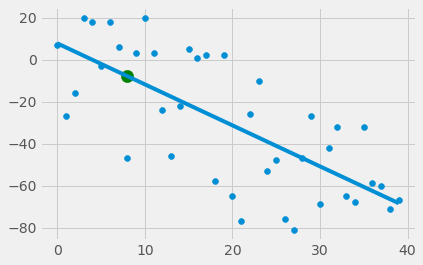

In [31]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import quandl, math, datetime
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
from matplotlib import style
import warnings

%matplotlib inline

style.use('ggplot')

##Github Issues Resolved
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings(action="ignore", module="scipy", message="^This module")




style.use('fivethirtyeight')

### Demo database simple arrays
# xs = np.array([1,2,3,4,5,6], dtype=np.float32)
# ys = np.array([5,4,6,5,6,7], dtype=np.float32)
###


### Dataset Generator
xs, ys = create_dataset(40, 40, 2, correlation='neg')
###

m, b = best_fit_slope_and_intercept(xs, ys)
# print(m)
# print(b)

regression_line = [(m*x) + b for x in xs]

predict_x = 8
predict_y = (m*predict_x) + b
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, s=150, color='g') # s is Size
plt.plot(xs, regression_line)
plt.show()

In [24]:
def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64) , np.array(ys, dtype=np.float64)

 

In [25]:
def best_fit_slope_and_intercept(xs, ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) /
        ((mean(xs)*mean(xs)) - mean(xs*xs)) )
    
    b  = mean(ys) - m*mean(xs)
    return m, b

In [39]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig) **2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr / squared_error_y_mean)

0.00791037882382
0.992089621176


<IPython.core.display.Javascript object>


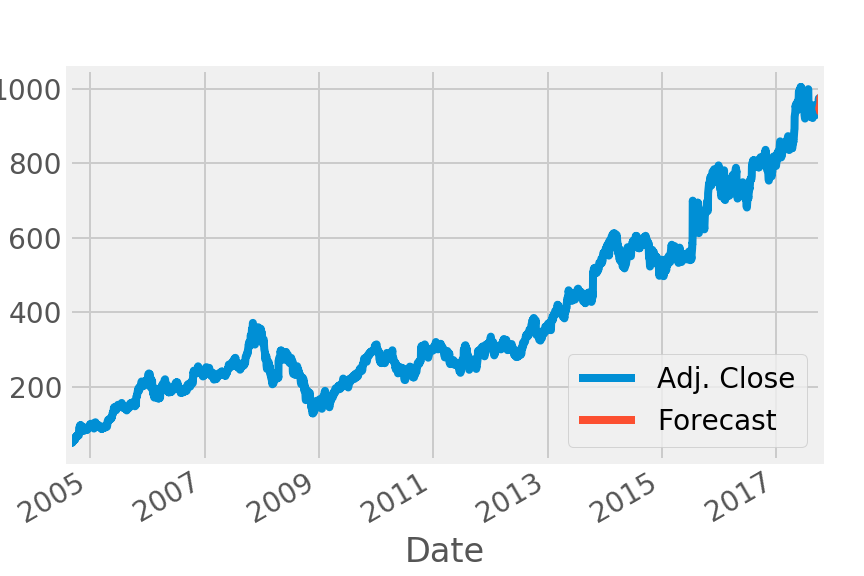

In [41]:
## Quandl Code
%matplotlib notebook

### Quandl Dataset
df = quandl.get('WIKI/GOOGL')
#print(df.tail())
df = df[['Adj. Close']]
forecast_col = 'Adj. Close' #Label Variable
#df.fillna(-99999,inplace=True)
forecast_out = 10
df['label'] = df[forecast_col].shift(-forecast_out)
df.dropna(inplace=True)
xs = np.array(df.drop(['label'],1),dtype=np.float64)
ys = np.array(df['label'],dtype=np.float64)
###

xs_lately = xs[-10:]
xs = xs[:-forecast_out]
ys = ys[:-forecast_out]

### 2D Linear Regression
m, b = best_fit_slope_and_intercept(xs.flatten(), ys.flatten())
regression_line = [(m*x) + b for x in xs]
regression_line = np.array(regression_line,dtype=np.float64)
# accuracy
r_squared = coefficient_of_determination(ys.flatten(), regression_line.flatten())
print(r_squared)
###

### Prediction
forecast_set = np.array([(m*x) + b for x in xs_lately],dtype=np.float64)
# print(forecast_set)
###

### Plotting time and forecasting
df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set.flatten():
	next_date = datetime.datetime.fromtimestamp(next_unix)
	next_unix += one_day
	df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()